In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('dataPlaty.csv')
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [42]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,count
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.0
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039,1.0
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094,0.0
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [2]:
noTechnical_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df_original = df.copy()
df = df[df['title'].apply(lambda i: i not in noTechnical_titles)]
df.title.value_counts() #vymaže netechnické pozice v datasetu.

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Name: title, dtype: int64

In [8]:
df['gender'].unique()
df['gender'].replace('Title: Senior Software Engineer', inplace=True)
df['gender'].replace('Unknown', inplace=True )
#vymazaní státem neuznávaná pohlaví

In [44]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
date_value_counts = df['timestamp'].value_counts()
date_value_counts

2020-02-25 13:25:07    3
2019-01-10 21:44:02    3
2019-10-25 10:26:31    3
2019-08-18 04:59:01    2
2019-09-06 06:49:56    2
                      ..
2020-05-14 01:52:06    1
2020-05-14 02:40:13    1
2020-05-14 03:03:59    1
2020-05-14 04:12:43    1
2019-01-29 05:12:59    1
Name: timestamp, Length: 62561, dtype: int64

In [6]:
stem_salaries = df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'})
df.isnull().sum()

timestamp                      0
company                        5
level                        105
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          843
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     18552
otherdetails               21871
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       39006
Education                  31244
dtype: int64

In [2]:
df.gender.value_counts() # pohlaví

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [39]:
df.location.value_counts() # nejvíce zastoupené města (Amerika).

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
San Fernando, LB, Philippines       1
Suwanee, GA                         1
Oxford, MS                          1
Wayne, PA                           1
Hilbert, WI                         1
Name: location, Length: 1050, dtype: int64

In [8]:
df[['basesalary','title','company']].sort_values(by='basesalary',ascending=False).head(20) # 20 nejvydělečnějších "lidi"

,basesalary,title,company
62351,1659870.0,Product Manager,Microsoft
61851,1620000.0,Software Engineer,Squarespace
45054,900000.0,Management Consultant,PwC
56175,893000.0,Software Engineer,Netflix
57701,861000.0,Software Engineer,Netflix
61967,850000.0,Software Engineering Manager,Microsoft
56529,840000.0,Software Engineer,Netflix
36746,800000.0,Software Engineer,Netflix
37462,800000.0,Software Engineering Manager,Netflix
16640,800000.0,Product Manager,Netflix


In [35]:
df['count'] = 1
most_common_companies =(
                    df.groupby(['company'])
                    .count()
                    .sort_values(by='count', ascending=False)
                    .head(20)
                    .reset_index()
                    )
most_common_companies[['company', 'count']] #Firmy s nejvyšším zastoupením.



,company,count
0,Amazon,8126
1,Microsoft,5216
2,Google,4330
3,Facebook,2990
4,Apple,2028
5,Oracle,1128
6,Salesforce,1056
7,Intel,949
8,IBM,907
9,Cisco,907


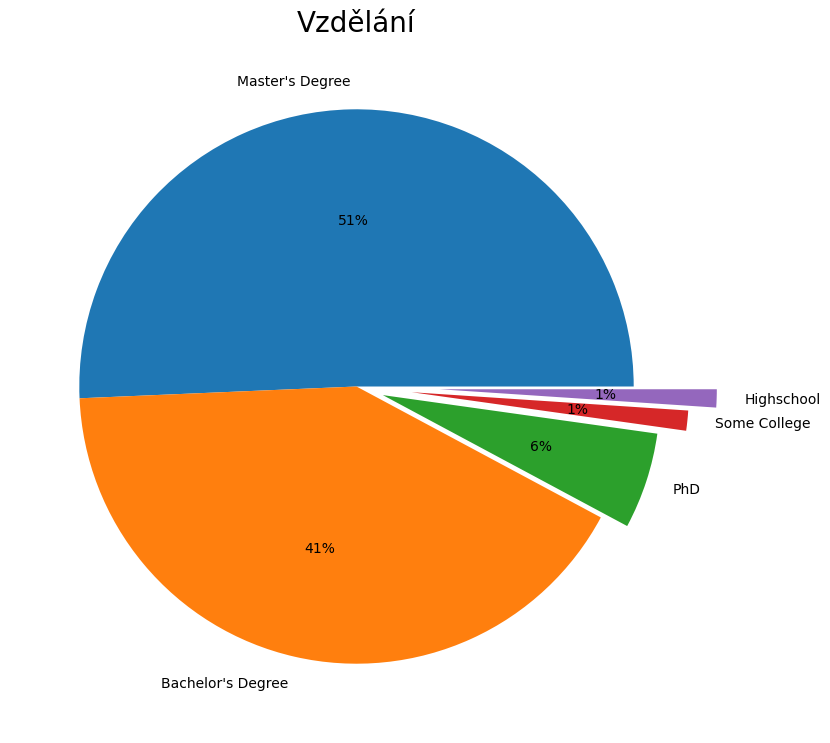

In [53]:
explode = [0, 0, 0.1, 0.2, 0.3]
education = df.Education.value_counts().plot.pie(figsize = (10,9),radius=1,shadow=False, label = '', autopct='%1.f%%', explode = explode)
plt.title('Vzdělání', size=20)
plt.show()

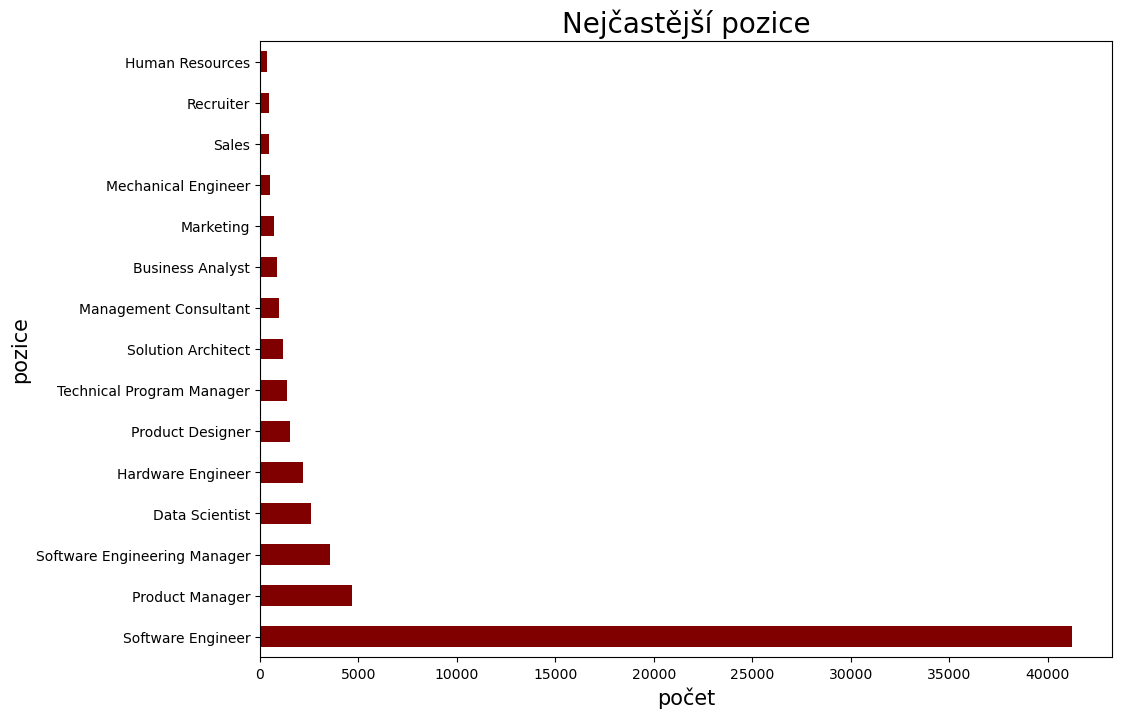

In [66]:
most_common_jobs = df.title.value_counts() #nejčastější pozice
most_common_jobs.plot.barh(figsize = (11,8),color='maroon')
plt.title("Nejčastější pozice" ,size=20)
plt.xlabel("počet" ,size= 15)
plt.ylabel("pozice", size = 15)
plt.show()